# Сборый проект №1. Определение потенциально популярного продукта для интернет-магазина

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Оглавление

* [Загрузка и первичный анализ данных](#1)
* [Подготовка данных](#2)
* [Исследовательский анализ данных](#3)
* [Портрет пользователя по регионам](#4)
* [Проверка гипотез](#5)
* [Общий вывод](#6)

<a id='1'></a>

### Этап 1. Загрузка и первичный анализ данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats as st

In [2]:
# загружаем данные
games = pd.read_csv('/datasets/games.csv')
# просматриваем таблицы
display(games, games.info(), games.describe())
# смотрим процент пропусков в каждом столбце
display(games.isna().sum(axis=0).sort_values(ascending=False) / len(games))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

None

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Genre              0.000120
Name               0.000120
Other_sales        0.000000
JP_sales           0.000000
EU_sales           0.000000
NA_sales           0.000000
Platform           0.000000
dtype: float64

In [3]:
# ищем столбец со значения рейтинга 'tbd'
display(games.Critic_Score.unique(), games.User_Score.unique(), games.Rating.unique())
# считаем количество 'tbd' в столбце
display(games.query('User_Score == "tbd"')['User_Score'].count())
display(games.query('User_Score == "tbd"').groupby('Year_of_Release')['Year_of_Release'].count())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

2424

Year_of_Release
1997.0      1
1999.0      8
2000.0     43
2001.0     82
2002.0    192
2003.0     95
2004.0    107
2005.0    121
2006.0    124
2007.0    192
2008.0    326
2009.0    405
2010.0    331
2011.0    217
2012.0     24
2013.0     15
2014.0     21
2015.0     38
2016.0     34
Name: Year_of_Release, dtype: int64

Мы загрузили датасет, содержащий данные по продажам видеоигр на различных платформах с 1980 по 2016 год (данные за 2016 год неполные). Размер датасета - 16715 х 11.

Таблица содержит 11 столбцов - названиеигры, платформы, год релиза, жанр, продажи по регионам и рейтинги - от критиков, пользовательский и возрастной. 
- Первое, что обращает на себя внимание - заглавные буквы в названиях столбцов. Названия следует привести к одному регистру.

Пропуски: 

- Примерно 300 пропусков в столбце с годом релиза - так как искать для каждой игры год релиза вручную в нашу работу не входит, точного значения статистическими методами мы не добьемся. Поэтому их можно оставить как есть.

- Большая часть пропусков - примерно половина - в столбцах с рейтингом. Причем как правило рейтингов если нет - то всех сразу. Можно было бы заполнить рейтинги, учитывая корреляцию их с продажами, но нам как раз эту корреляцию и предстоит найти. Поэтому придется исходить из того что есть. Также в столбце с пользовательским рейтингом есть значения 'tbd' - что означает "to be displayed". Для нас это значит то же, что и NaN - поэтому NaN'ами эти значения и заменим. Распределены они по годам независимо от "возраста" игры, что служит еще одним аргументом в пользу такой замены. 

- Еще есть несколько пропусков в столбцах с жанром и названием игры - всего 2, учитывать их нет смысла.

Причины пропусков - скорее всего в том, что не существует одного централизованного сервиса, где для каждой игры давались бы все виды рейтинга. Данные наверняка собраны с разных ресурсов, отсюда и их разнородность.

<a id='2'></a>

### Этап 2. Подготовка данных

In [4]:
# приводим названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()
# проверяем результат
display(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# приводим столбец с годом релиза к целочисленному типу
games['year_of_release'] = games['year_of_release'].astype('Int16')
# проверяем результат
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int16
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int16(1), float64(5), object(5)
memory usage: 1.3+ MB


In [6]:
# заменяем значения tbd пропусками
games.user_score = games.user_score.replace('tbd', np.nan)
# приводим столбец user_score к типу с плавающей точкой
games.user_score = games.user_score.astype('Float32')
# проверяем результат
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int16
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float32
rating             9949 non-null object
dtypes: Int16(1), float32(1), float64(5), object(4)
memory usage: 1.3+ MB


Названия столбцов приведены к нижнему регистру, год релиза - к целочисленному типу, значения 'tbd' - заменены пропусками.

In [7]:
# смотрим уникальные значения для строковых столбцов
string_columns = ['name', 'platform', 'genre', 'rating']
for column in string_columns:
    display(games[column].unique())
# проверяем наличие дубликатов
games.duplicated().sum()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

0

В названиях платформ, жанров и рейтингов дубликатов не обнаружено,как и в целом по таблице.

In [8]:
# пишем функцию для определения общих продаж
def total_param(dataset, param):
    """ write param in quotes """
    param_list = []
    for column in dataset.columns:
        if param in column:
            param_list.append(dataset[column])
    dataset['total_' + param] = sum(param_list)
    return dataset
# применяем её
total_param(games, 'sales')
# смотрим результат
display(games)

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  total_sales  
0          E        82.54  
1        NaN        40.24  
2          E        35.52  
3          E        32.77  
4        NaN        31.38  
...      ...          ...  
16710    NaN         0.01  
16711    NaN         0.01  
16712    NaN         0.01  
16713    NaN         0.01  
16714    NaN         0.01  

[16715 rows x 12 columns]

Посчитаны и занесены в отдельный столбец суммарные продажи для каждой игры.

<a id='3'></a>

### Этап 3. Исследовательский анализ данных

In [9]:
# группируем таблицу, подсчитываем количество игр по годам
games_by_year = games.groupby('year_of_release')['year_of_release'].count()
# группируем таблицу, подсчитываем общие продажи по годам
sales_by_year = games.groupby('year_of_release')['total_sales'].sum()
# строим графики
fig = go.Figure()
fig.add_trace(go.Bar(x=games_by_year.index,
                y=games_by_year.values,
                marker_color='rgb(155, 83, 109)'
                ))
fig.update_layout(title_text='Количество вышедших игр по годам')
fig.show()
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_by_year.index,
                y=sales_by_year.values,
                marker_color='rgb(135, 153, 19)'
                ))
fig.update_layout(title_text='Продажи игр по годам')
fig.show()

Посмотрев статистику выхода игр и их суммарных продаж по годам, приходим к неутешительному выводу - пик интереса к играм на ПК и консолях пришелся на 2008 и 2009 годы. Сейчас все более увеличивается доля мобильных игр и сервисов типа Steam. Однако, нам надо определить потенциально популярный продукт в нашей категории и сделать это возможно. 

total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12
PS             730.86
GBA            317.85
PS4            314.14
PSP            294.05
PC             259.52
3DS            259.00
XB             257.74
GB             255.46
NES            251.05
N64            218.68
SNES           200.04
GC             198.93
XOne           159.32
2600            96.98
WiiU            82.19
PSV             54.07
SAT             33.59
GEN             30.77
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03

total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
...                               ...
XB       2004                   65.42
         2005                   49.08
         2006                   10.04
         2007                    0.55
         2008                    0.18

[157 rows x 1 columns]

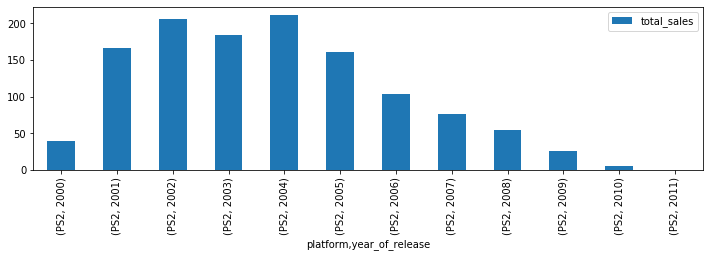

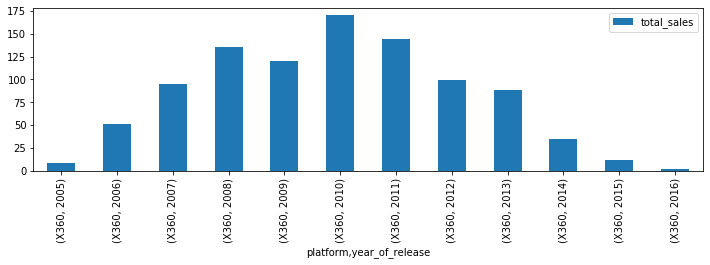

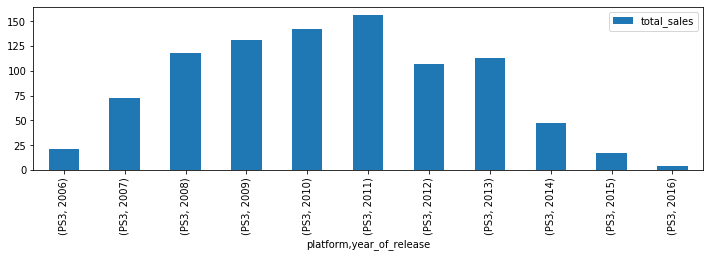

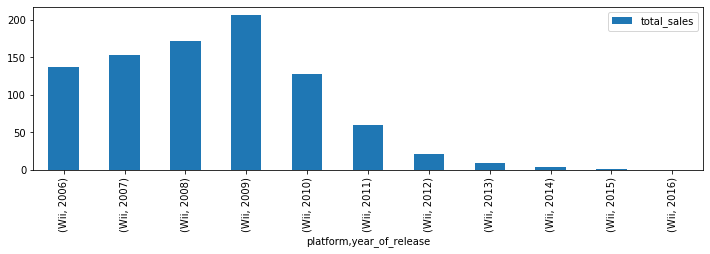

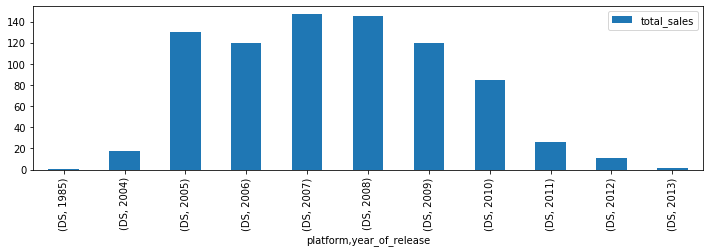

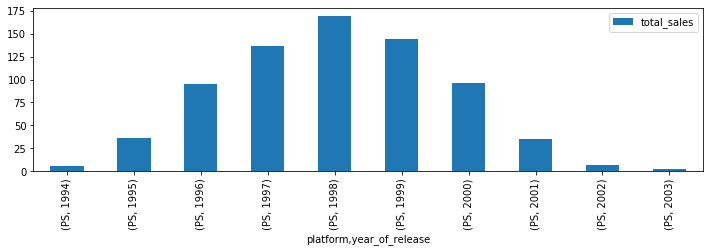

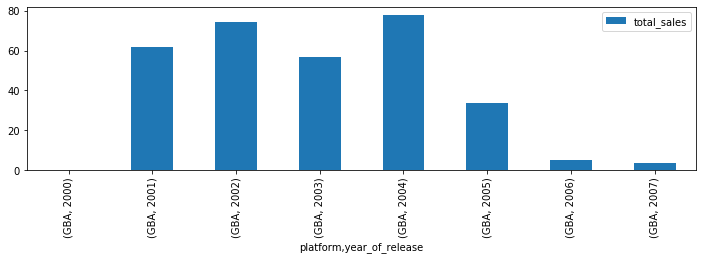

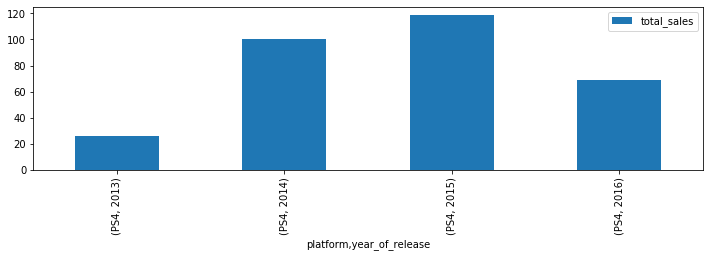

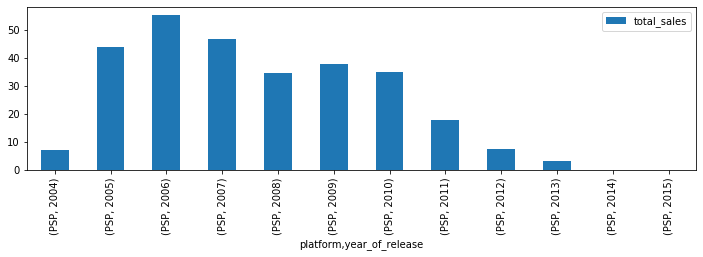

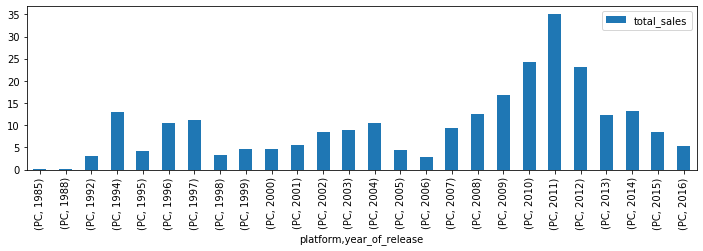

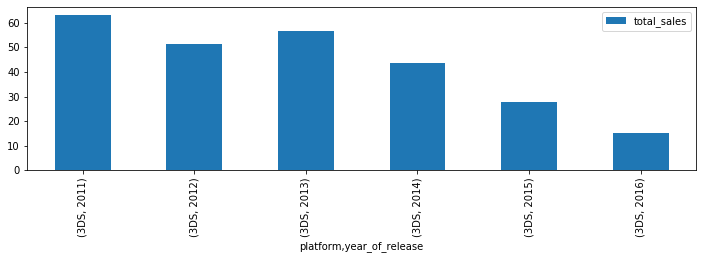

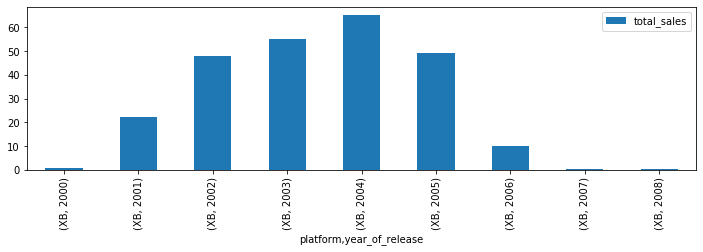

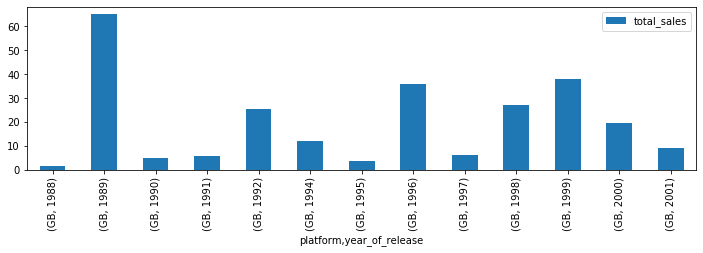

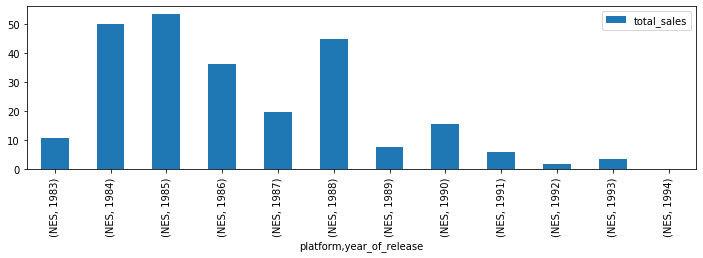

In [10]:
# создаем сводную таблицу продаж по платформам
games_by_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
# просматриваем
display(games_by_platform)
# создаем список платформ с max продажами
max_sales_platform = list(games_by_platform.query('total_sales >= 250').index)
# создаем срез по выбранным ограничениям
max_sales_by_year = games.query('platform in @max_sales_platform').pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
# просматриваем
display(max_sales_by_year)  
# строим графики
for platform in max_sales_platform:
    max_sales_by_year.query('platform == @platform').plot(kind='bar', figsize=(12,3))

Просмотрев статистику общих продаж по платформам, видим - есть 6 платформ с продажами более 700 миллионов долларов, все остальные - более чем в два раза менее прибыльные. Границу отсечения для анализа считаю разумным поставить в 250 миллионов. При просмотре статистики продаж по самым прибыльным платформам видно, что у каждой платформы сначала примерно 3-5 лет роста, затем такой же по продолжительности спад. У первого поколения PlayStation график - почти идеальное нормальное распределение). Исключение составляют лишь ПК - три периода роста и падения. Ближе к 2016 году - спад, и неясно, последует ли за этим новый рост.

total_sales
platform             
PS3            285.19
PS4            244.89
X360           235.02
3DS            179.47
XOne           133.17
WiiU            77.59
PC              57.40
PSV             44.93
Wii             35.19
DS              12.55
PSP             11.19

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
PS3      2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14

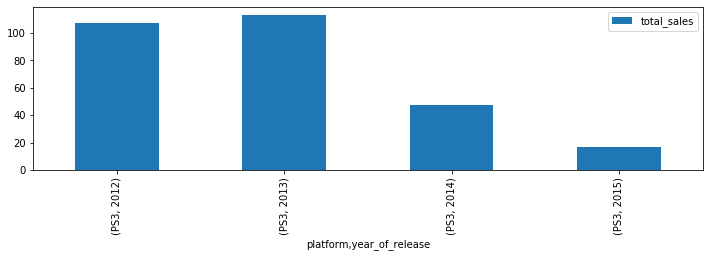

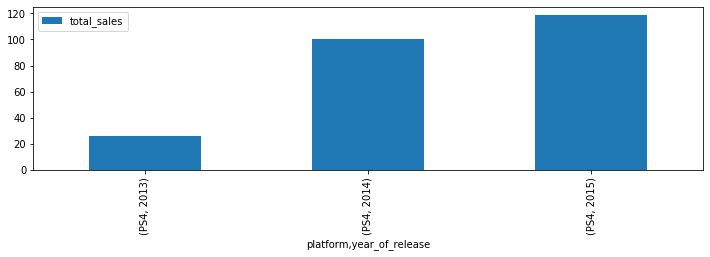

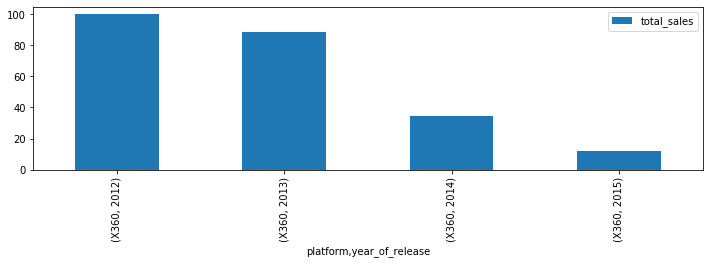

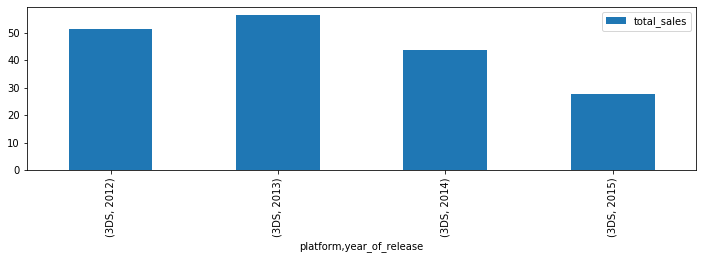

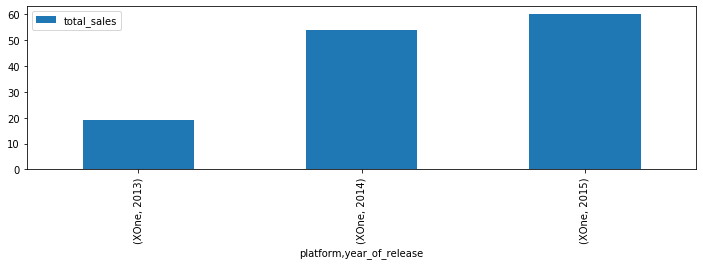

In [11]:
# создаем сводную таблицу за актуальный период
games_by_platform = games.query('year_of_release >= 2012 & year_of_release <=2015').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
display(games_by_platform)
# меняем лист с платформами, отвечающими условию
max_sales_platform = list(games_by_platform.query('total_sales >= 100').index)
# создаем срез по выбранным ограничениям и по нему сводную таблицу
max_sales_by_year = games.query('platform in @max_sales_platform & year_of_release >= 2012 & year_of_release <=2015').pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
display(max_sales_by_year)
# строим графики
for platform in max_sales_platform:
    max_sales_by_year.query('platform == @platform').plot(kind='bar', figsize=(12,3))

Актуальный период я определил с 2012 по 2015 годы. В 2012 году произошел перелом тренда - спад продаж и количества игр остановился, наступила некоторая стабилизация. 2015 годом же ограничился, так как данные за 2016 год неполные. Исходя из общей картины жизни консолей, если продажи росли в актуальный период - они выросли и в 2016, и вырастут в 2017 году. 

Выделив 5 самых коммерчески успешных платформ, можно увидеть - продажи растут лишь у двух из них - PS4 и XOne. Эти платформы и являются потенциально прибыльными.

In [12]:
# Делаем срез из общей таблицы по актуальному периоду для дальнейшей работы
data_actual = games.query('year_of_release >= 2012 & year_of_release <= 2015')
# Проверяем результат
display(data_actual)

name platform  year_of_release  \
16                             Grand Theft Auto V      PS3             2013   
23                             Grand Theft Auto V     X360             2013   
31                      Call of Duty: Black Ops 3      PS4             2015   
33                            Pokemon X/Pokemon Y      3DS             2013   
34                     Call of Duty: Black Ops II      PS3             2012   
...                                           ...      ...              ...   
16674               Tsukigime Ranko's Longest Day      PS3             2014   
16678                              End of Nations       PC             2012   
16682  Grisaia no Kajitsu: La Fruit de la Grisaia      PSP             2013   
16692           Metal Gear Solid V: Ground Zeroes       PC             2014   
16707                            Aiyoku no Eustia      PSV             2014   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16           Action      7.02      9.09      0.98         3.96          97.0   
23           Action      9.66      5.14      0.06         1.41          97.0   
31          Shooter      6.03      5.86      0.36         2.38           NaN   
33     Role-Playing      5.28      4.19      4.35         0.78           NaN   
34          Shooter      4.99      5.73      0.65         2.42          83.0   
...             ...       ...       ...       ...          ...           ...   
16674        Action      0.00      0.01      0.00         0.00           NaN   
16678      Strategy      0.01      0.00      0.00         0.00           NaN   
16682     Adventure      0.00      0.00      0.01         0.00           NaN   
16692        Action      0.00      0.01      0.00         0.00          80.0   
16707          Misc      0.00      0.00      0.01         0.00           NaN   

       user_score rating  total_sales  
16            8.2      M        21.05  
23            8.1      M        16.27  
31            NaN    NaN        14.63  
33            NaN    NaN        14.60  
34            5.3      M        13.79  
...           ...    ...          ...  
16674         NaN    NaN         0.01  
16678         NaN      T         0.01  
16682         NaN    NaN         0.01  
16692         7.6      M         0.01  
16707         NaN    NaN         0.01  

[2384 rows x 12 columns]

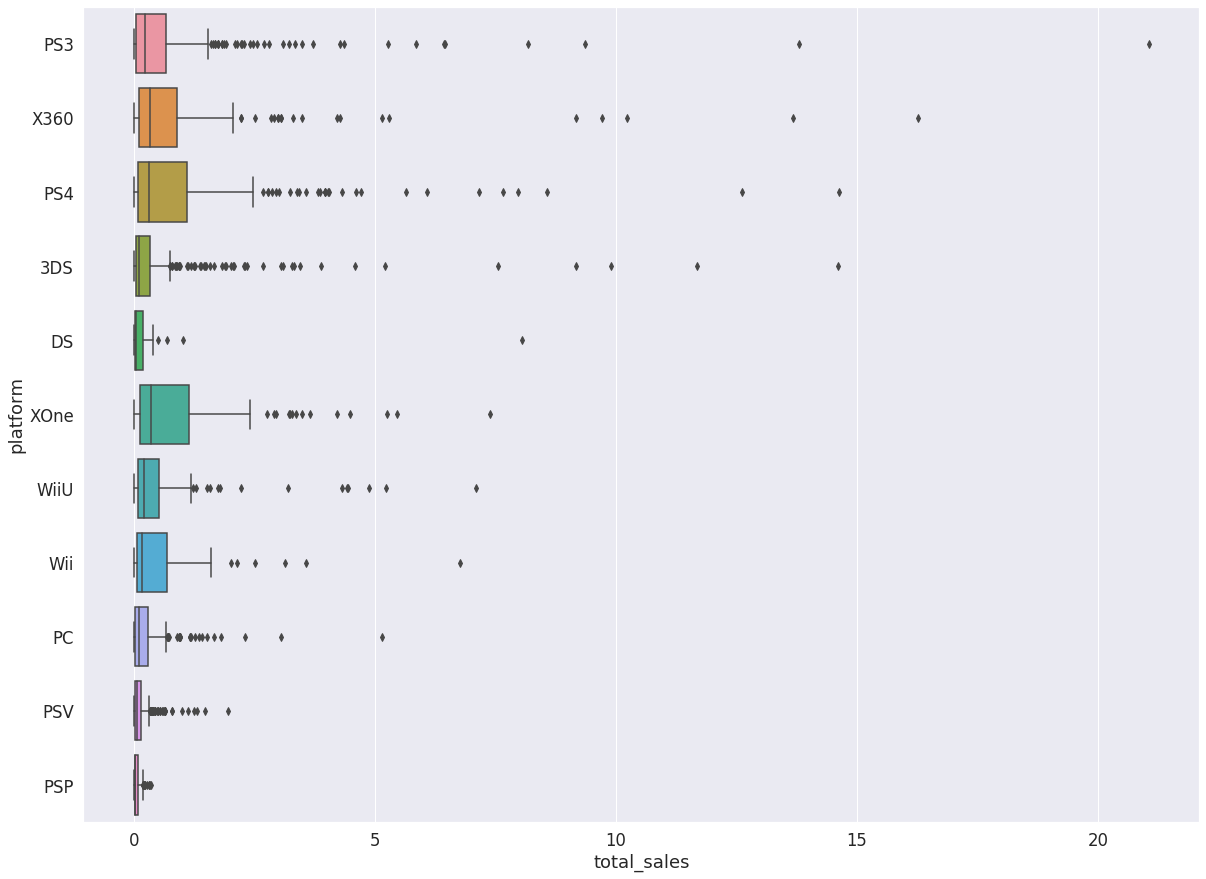

In [13]:
# строим boxplot'ы по продажам, в разбивке по платформам
sns.set(font_scale = 1.5)
plt.figure(figsize=(20,15))
ax2 = sns.boxplot(x=data_actual['total_sales'], y=data_actual['platform'])

Построив "ящик с усами" по глобальным продажам игр в разбивке по платформам, видим следующее - количество и величина выбросов растут больше всего у самых прибыльных платформ. Это говорит о том, что существенный вклад в успешность этих платформ вносят отдельные "игры-бестселлеры". И даже если не учитывать выбросы, самыми прибыльными за актуальный период оказываются PS4 и XOne - подтверждая наше предположение.

critic_score  total_sales  user_score
critic_score      1.000000     0.459385    0.499502
total_sales       0.459385     1.000000   -0.039268
user_score        0.499502    -0.039268    1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72decd4410>,
      dtype=object)

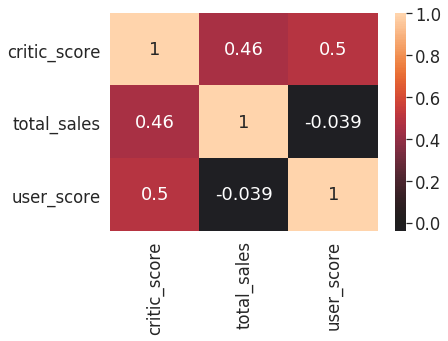

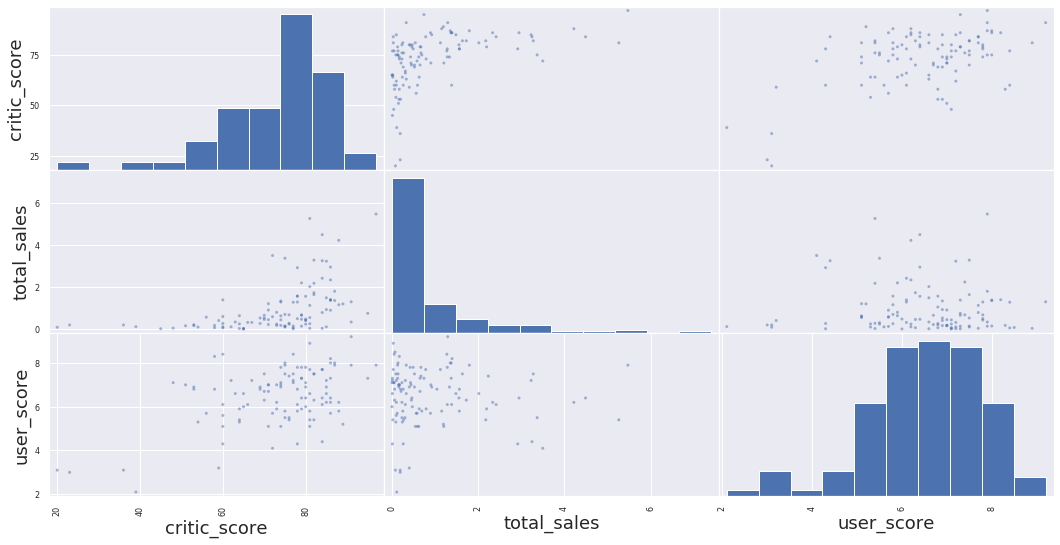

In [14]:
# строим сводную таблицу для корреляции параметров
sales_scores = data_actual.query('platform == "XOne"').pivot_table(index='name', values=['critic_score', 'user_score', 'total_sales'])
# смотрим корреляцию
display(sales_scores.corr())
# строим heatmap
ax = sns.heatmap(sales_scores.corr(), center=0, annot=True)
# cтроим диаграмму рассеяния
pd.plotting.scatter_matrix(sales_scores, figsize=(18, 9))

Далее мы проанализировали, как влияют отзывы зрителей и критиков на продажи внутри отдельной платформы. Для анализа была выбрана платформа XOne.

Выяснилось, что корреляция между отзывами критиков и продажами гораздо сильнее, чем между отзывами пользователей и продажами. Мнение критиков для индустрии важнее мнения пользователей. Однако продажи не прямо зависят от рейтинга. При увеличении рейтинга критиков продажи растут, но не сильно. И лишь уже упомянутые выше бестселлеры приносят создателям финансовый успех, неизменно собирая хорошие отзывы. Однако, если присмотреться к графику, те игры, которые были хорошо приняты критиками, обычно не столь хорошо принимаются пользователями. Кто объективнее, первые или вторые, мы статистическими методами определить не сможем)

В целом, для определения целей для рекламных компаний лучше ориентироваться на отзывы критиков (особенно если учесть, что эти отзывы - как правило и есть часть рекламной кампании). А пользователи в любом случае купят разрекламированный и расхваленный в изданиях продукт.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72d54d3250>,
      dtype=object)

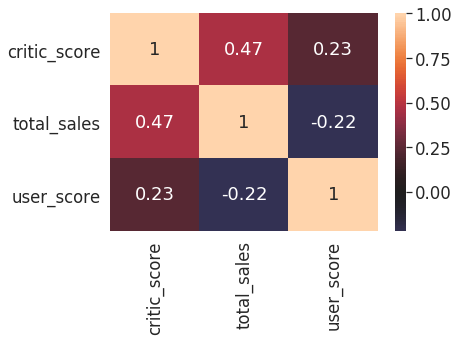

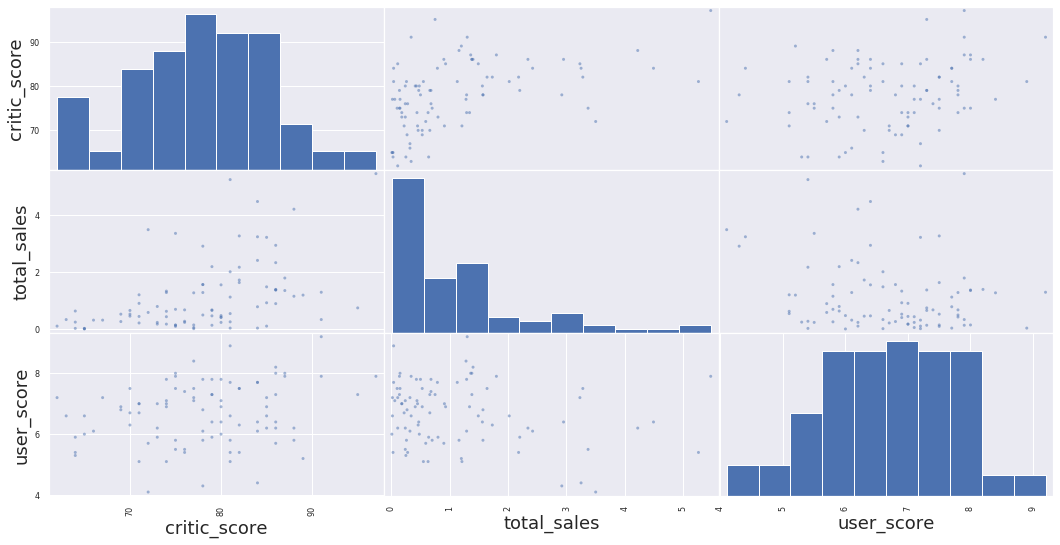

In [16]:
ax = sns.heatmap(sales_scores.query('critic_score > 60').corr(), center=0, annot=True)
pd.plotting.scatter_matrix(sales_scores.query('critic_score > 60'), figsize=(18, 9))

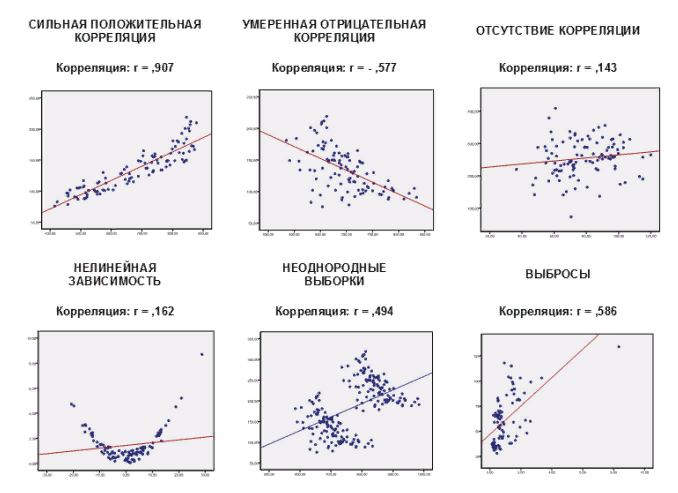

critic_score  total_sales  user_score
critic_score      1.000000     0.431848    0.612451
total_sales       0.431848     1.000000    0.024231
user_score        0.612451     0.024231    1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72d5f30390>,
      dtype=object)

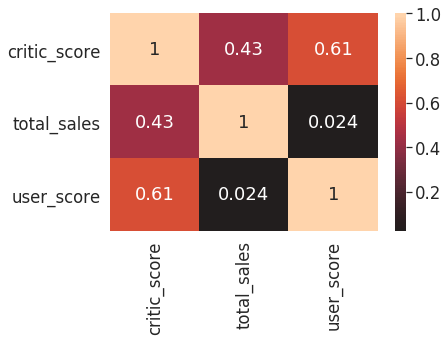

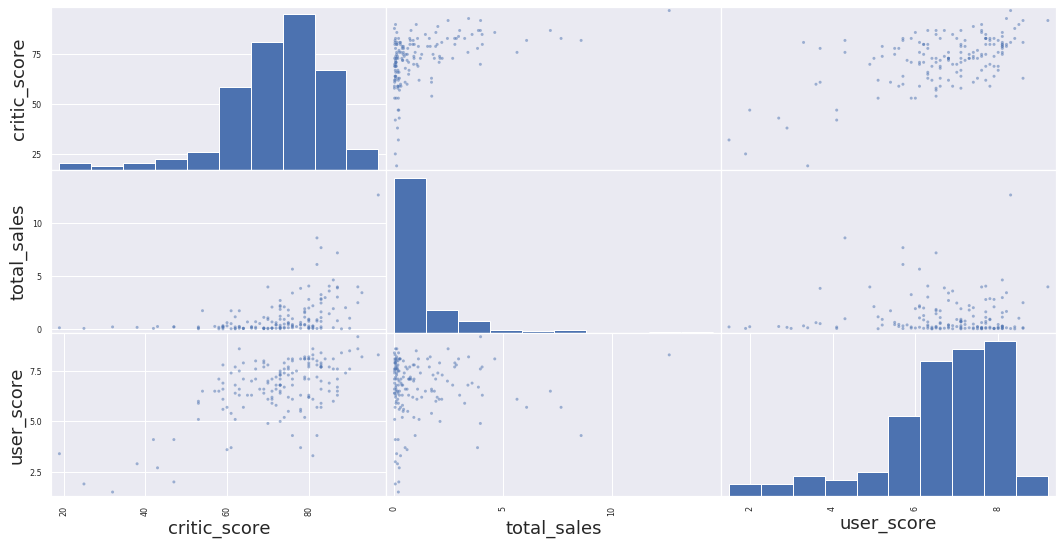

In [18]:
# повторяем действия, для следующей платформы
sales_scores2 = data_actual.query('platform == "PS4"').pivot_table(index='name', values=['critic_score', 'user_score', 'total_sales'])
display(sales_scores2.corr())
ax = sns.heatmap(sales_scores2.corr(), center=0, annot=True)
pd.plotting.scatter_matrix(sales_scores2, figsize=(18, 9))

Корреляция рейтингов и продаж на платформе PS4 примерно повторяет таковую у XOne: слабая зависимость продаж от user_score, самые прибыльные игры - стабильно в топе у критиков, но далеко не обязательно - у игроков.

critic_score  total_sales  user_score
critic_score      1.000000     0.339916    0.581508
total_sales       0.339916     1.000000    0.073487
user_score        0.581508     0.073487    1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72d51d8a90>,
      dtype=object)

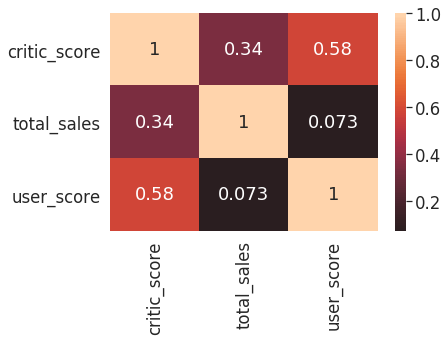

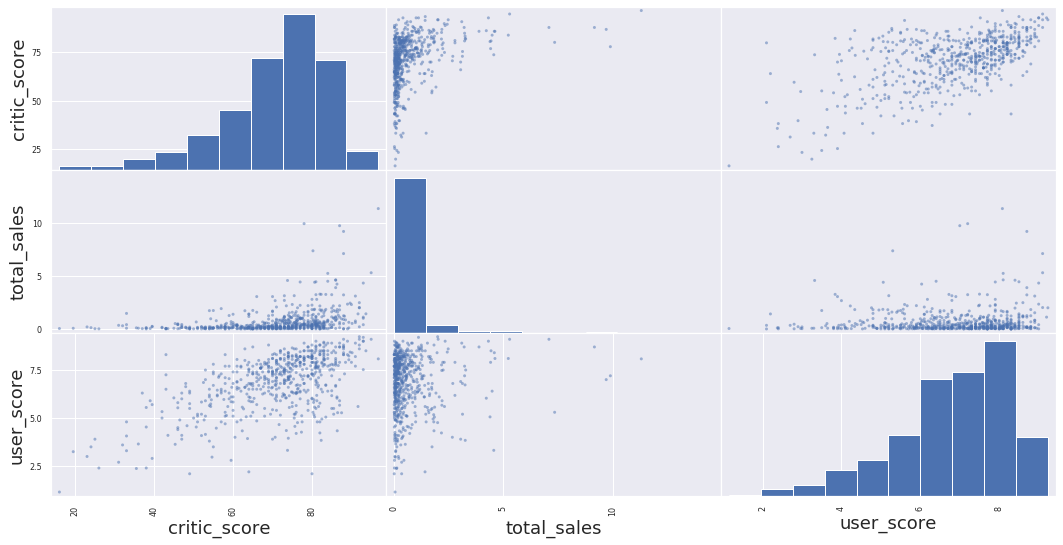

In [19]:
# повторяем действия, для всех платформ
sales_scores3 = data_actual.pivot_table(index='name', values=['critic_score', 'user_score', 'total_sales'])
display(sales_scores3.corr())
ax = sns.heatmap(sales_scores3.corr(), center=0, annot=True)
pd.plotting.scatter_matrix(sales_scores3, figsize=(18, 9))

Посчитав корреляцию и построив диаграмму рассеяния для всех платформ, картину получаем несколько иной. Корреляции продаж с рейтингами примерно те же, а вот на диаграмме рассеяния есть отличие - у самых прибыльных игр пользовательский рейтинг более смещен в сторону рейтинга критиков. Объяснение этого видится мне в том, что критики как правило выносят свои оценки сразу после выхода, а пользователи - в течение всего времени, когда игра хоть как то популярна. И признание игроков к топовым продуктам просто приходит не сразу.

Однако, у нашего магазина "Стримчик" скорее всего нет времени ждать признания пользователей, и ориентироваться я все равно предлагаю на оценки критиков

total_sales
genre                    
Action             411.01
Shooter            266.51
Role-Playing       174.62
Sports             157.58
Misc                82.44
Platform            57.77
Racing              50.71
Fighting            40.02
Simulation          33.23
Adventure           25.61
Strategy            12.21
Puzzle               4.88

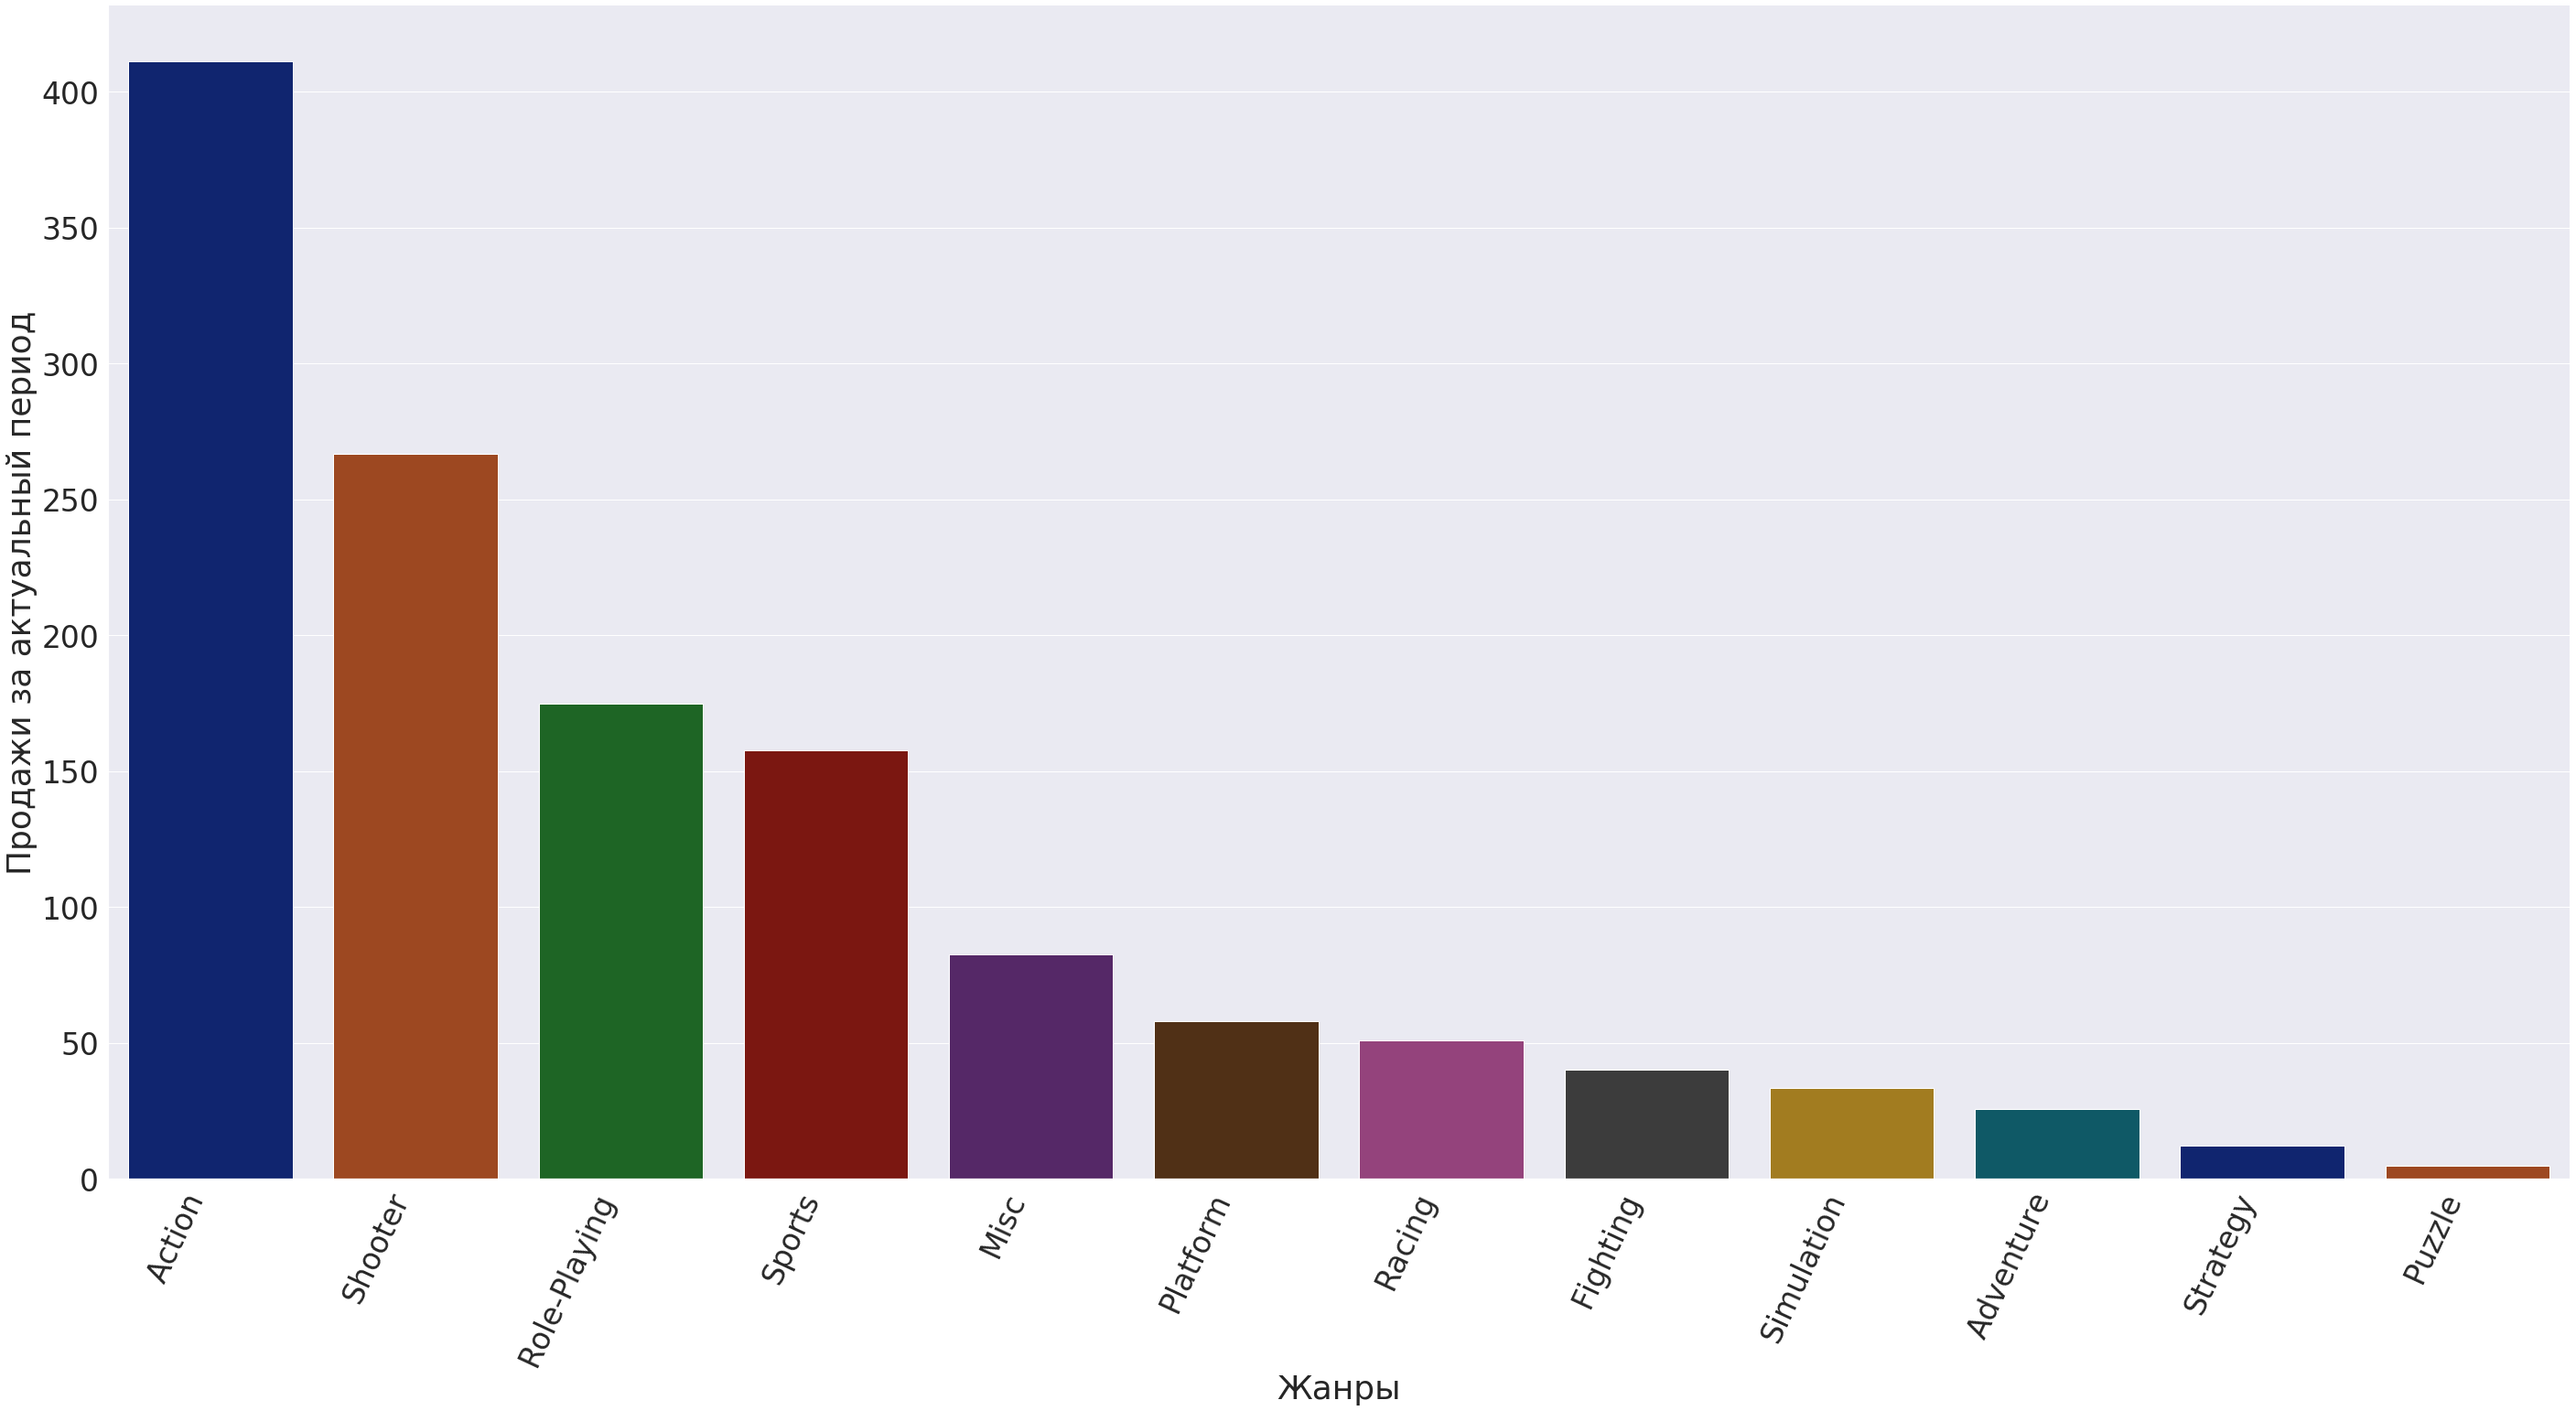

total_sales
genre                    
Action            1744.17
Sports            1331.27
Shooter           1052.45
Role-Playing       934.56
Platform           827.77
Misc               802.51
Racing             728.67
Fighting           447.53
Simulation         389.97
Puzzle             242.57
Adventure          237.59
Strategy           174.23

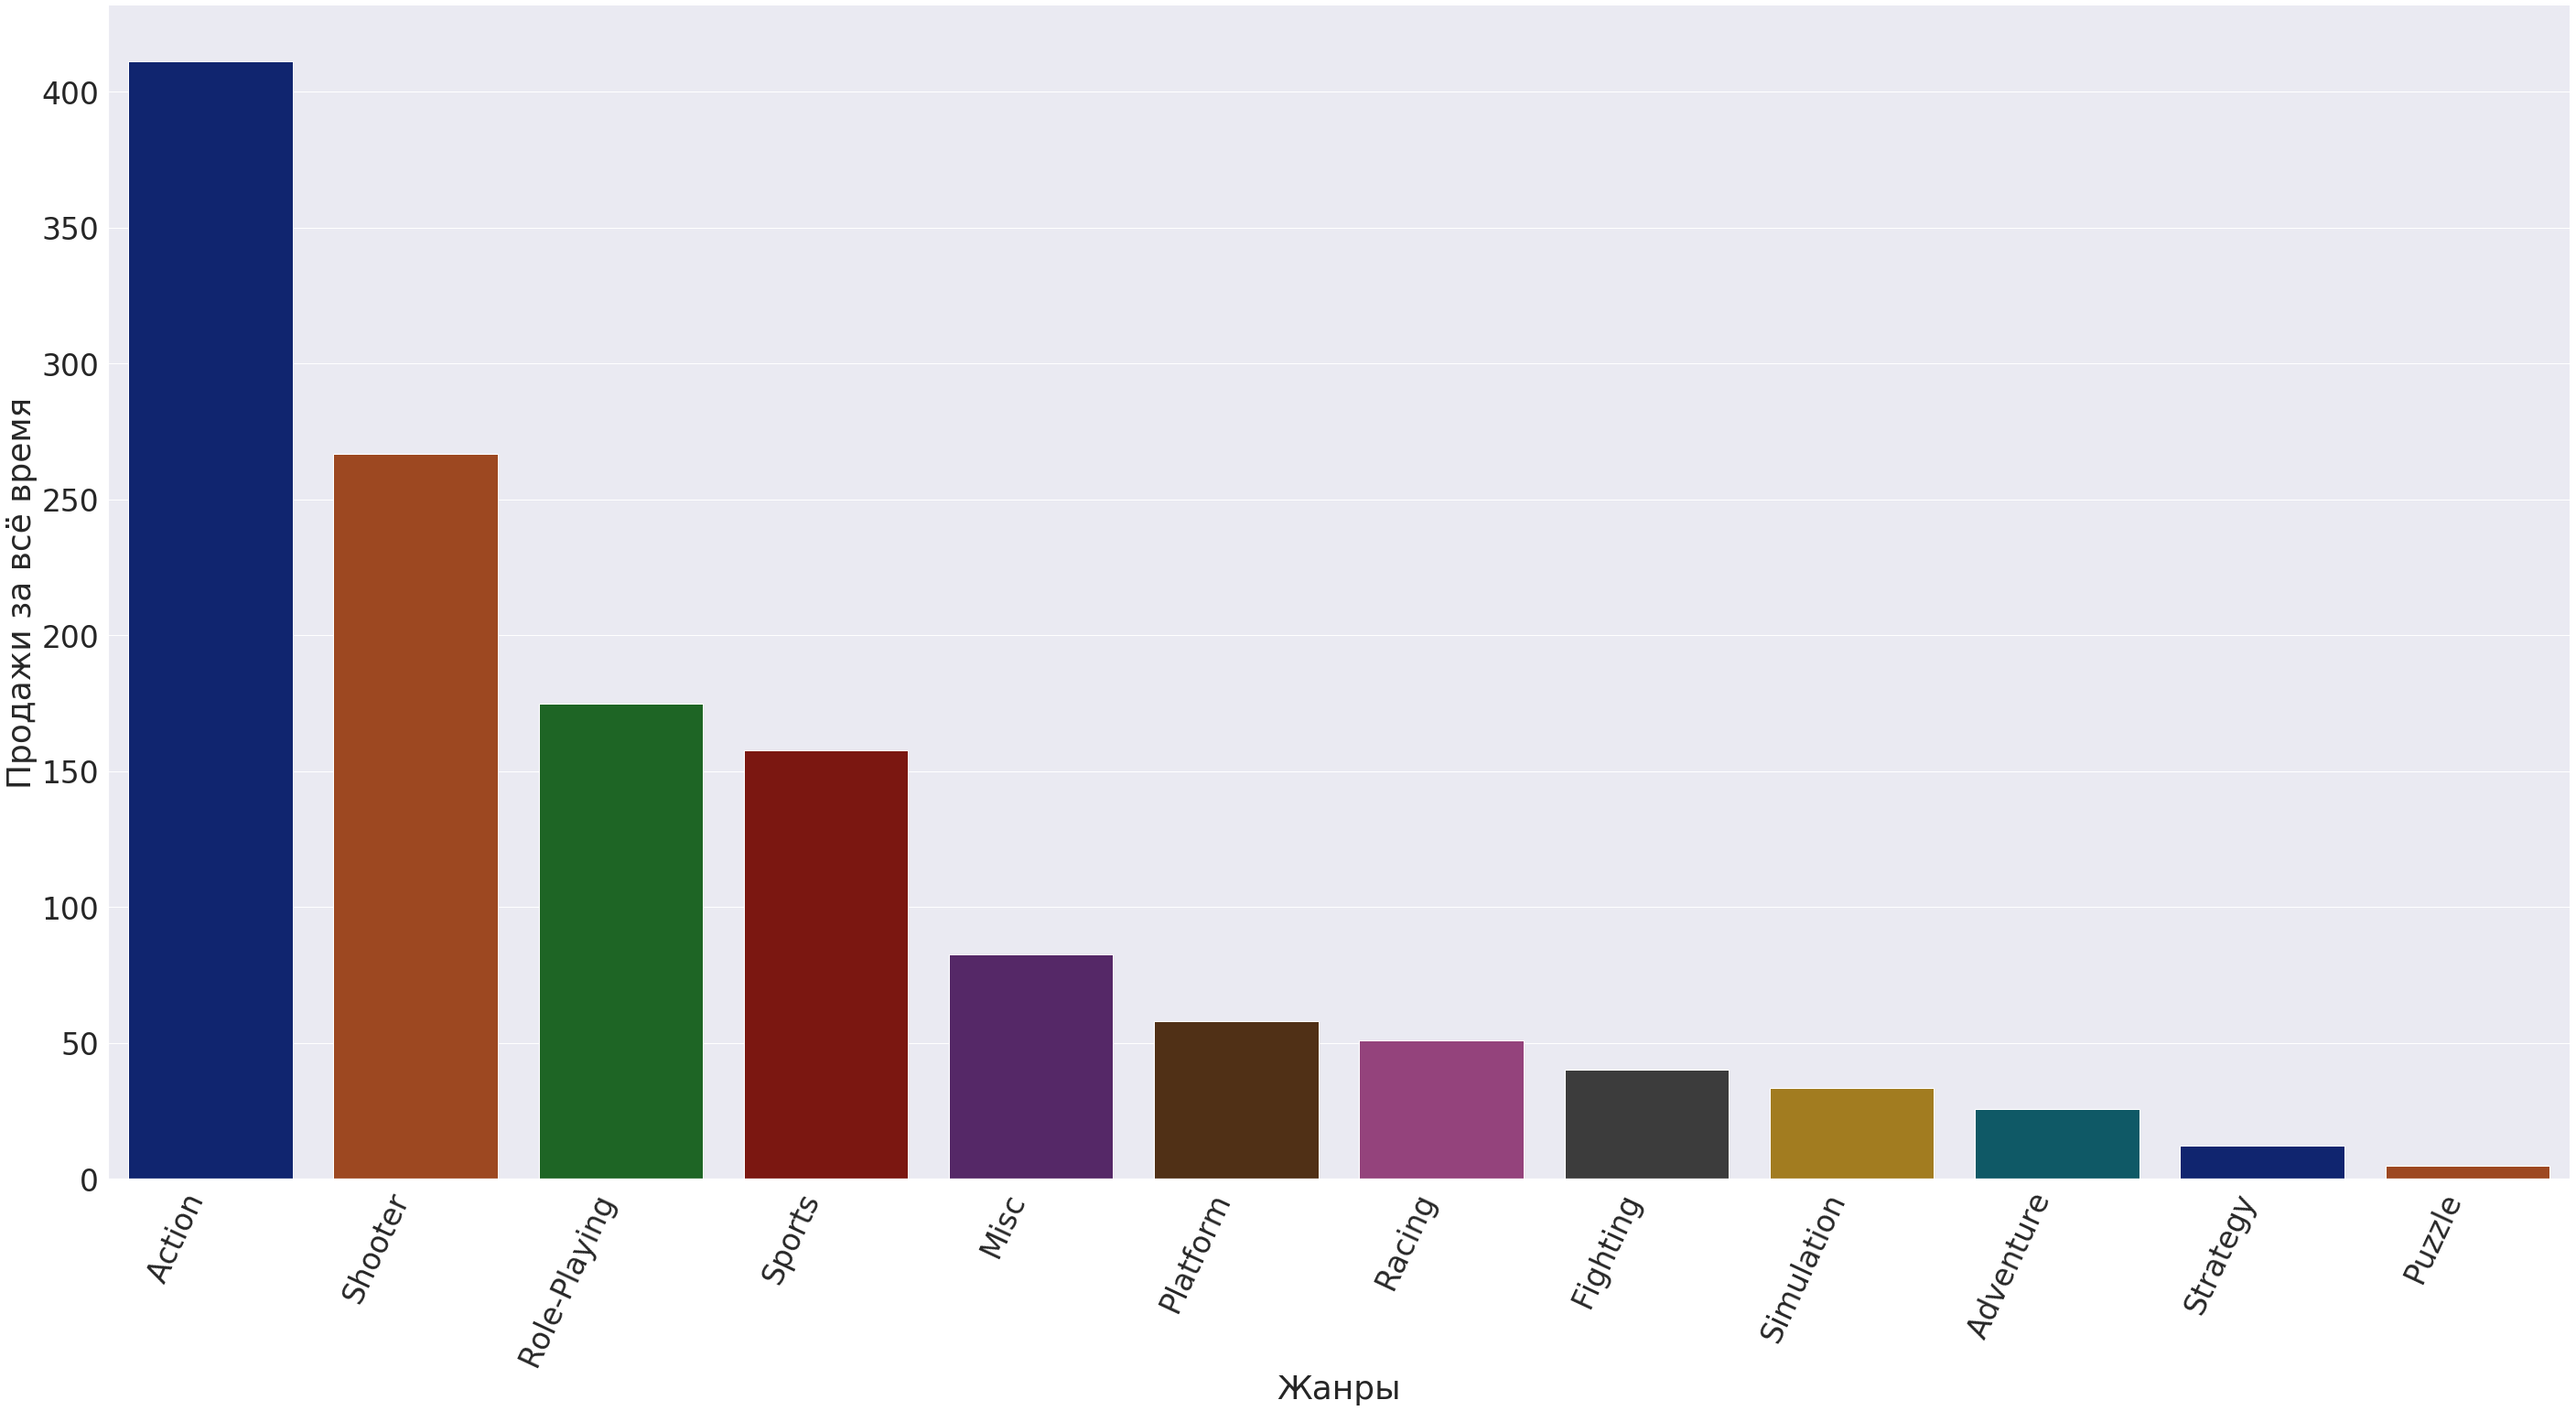

In [20]:
# строим сводную таблицу для жанров по продажам за актуальный период
genre_sales = data_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
display(genre_sales)
# строим график
sns.set(font_scale = 3)
ax = sns.catplot(x = list(genre_sales.index), y='total_sales', kind='bar', palette = 'dark', 
            data = genre_sales, height = 20, aspect = 2).set_xticklabels(rotation = 65, 
            horizontalalignment = 'right').set(xlabel='Жанры', ylabel='Продажи за актуальный период')
plt.show()
# строим сводную таблицу для жанров по продажам за всё время
genre_sales_alltime = games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
display(genre_sales_alltime)
# строим график
sns.set(font_scale = 3)
ax = sns.catplot(x = list(genre_sales.index), y='total_sales', kind='bar', palette = 'dark', 
            data = genre_sales, height = 20, aspect = 2).set_xticklabels(rotation = 65, 
            horizontalalignment = 'right').set(xlabel='Жанры', ylabel='Продажи за всё время')
plt.show()

Продажи игр по жанрам распределены крайне неравномерно, как за актуальный период, так и за все время. Причем в последние годы разрыв увеличился до десятков раз.

Самый актуальный жанр - Action. Следующие три места - спортивные, ролевые игры и "стрелялки". Причем спортивные игры в последнее время стали менее популярны. Среди всех остальных жанров радикальных изменений по позициям нет, разве что жанр "puzzle" стал почти никому не интересен

<a id='4'></a>

### Этап 4. Портрет пользователя по регионам

'Топ 5 платформ по продажам в Северной Америке:'

platform  na_sales
0     X360    139.36
1      PS3    102.71
2      PS4     87.25
3     XOne     78.85
4      3DS     51.17

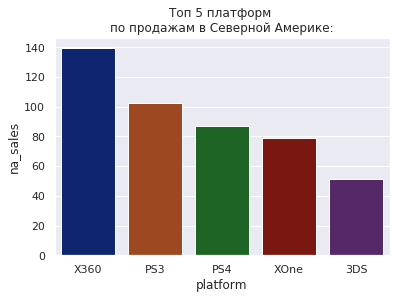

'Топ 5 жанров по продажам в Северной Америке:'

genre  na_sales
0        Action    168.55
1       Shooter    128.53
2        Sports     73.99
3  Role-Playing     58.11
4          Misc     37.43

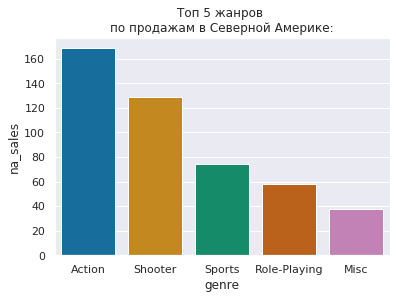

'Топ 5 платформ по продажам в Европе:'

platform  eu_sales
0      PS4    109.31
1      PS3    105.60
2     X360     73.81
3     XOne     41.96
4      3DS     40.31

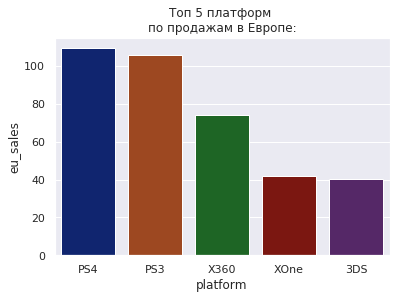

'Топ 5 жанров по продажам в Европе:'

genre  eu_sales
0        Action    148.66
1       Shooter     97.57
2        Sports     57.08
3  Role-Playing     44.25
4          Misc     25.66

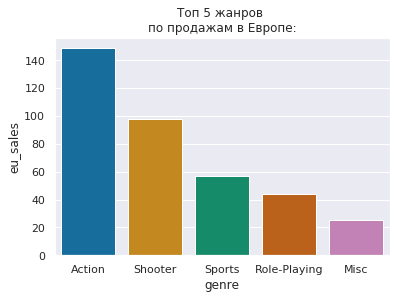

'Топ 5 платформ по продажам в Японии:'

platform  jp_sales
0      3DS     79.76
1      PS3     33.99
2      PSV     17.48
3     WiiU     12.34
4      PSP     10.47

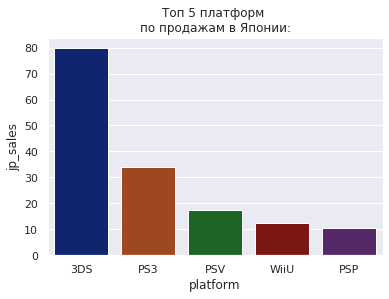

'Топ 5 жанров по продажам в Японии:'

genre  jp_sales
0  Role-Playing     58.83
1        Action     45.73
2          Misc     11.82
3    Simulation     10.08
4      Fighting      8.69

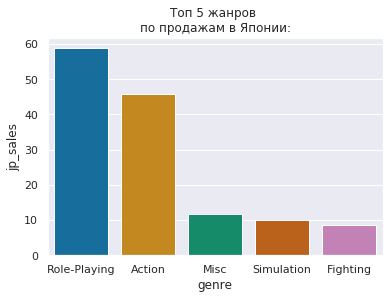

'Топ 5 платформ по продажам в прочих регионах:'

platform  other_sales
0      PS3        42.89
1      PS4        38.11
2     X360        20.28
3     XOne        12.03
4      3DS         8.23

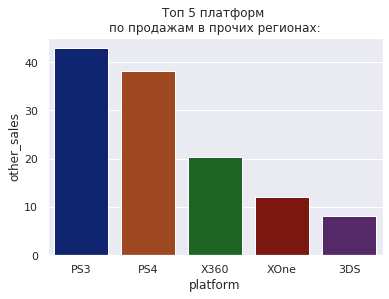

'Топ 5 жанров по продажам в прочих регионах:'

genre  other_sales
0        Action        48.07
1       Shooter        32.24
2        Sports        19.42
3  Role-Playing        13.43
4          Misc         7.53

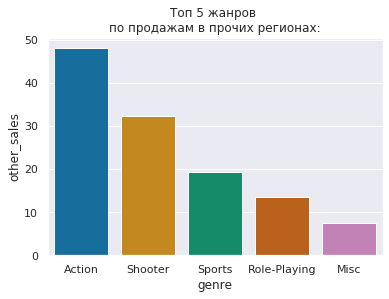

In [21]:
# создаем вспомогательные списки и словари
region_dict = {'na_sales': 'в Северной Америке', 'eu_sales': 'в Европе', 'jp_sales' : 'в Японии', 'other_sales': 'в прочих регионах'}
region_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
sns.set(font_scale = 1)
# пишем цикл для построения сводных таблиц и графиков 
for region in region_sales:
    top5_platforms = data_actual.pivot_table(index = 'platform', 
                   values = region, aggfunc = 'sum').nlargest(5, region).reset_index(level = 'platform')
    display('Топ 5 платформ по продажам {}:'.format(region_dict[region]), top5_platforms)
    sns.barplot(x=top5_platforms['platform'], y=top5_platforms[region], palette = 'dark').set_title('Топ 5 платформ \nпо продажам {}:'.format(region_dict[region]))
    plt.show()
    
    top5_genres = data_actual.pivot_table(index = 'genre',
                                values = region, aggfunc = 'sum').nlargest(5, region).reset_index(level = 'genre')
    display('Топ 5 жанров по продажам {}:'.format(region_dict[region]), top5_genres)
    sns.barplot(x=top5_genres['genre'], y=top5_genres[region], palette = 'colorblind').set_title('Топ 5 жанров \nпо продажам {}:'.format(region_dict[region]))
    plt.show()

Самые популярные платформы и жанры по регионам:
- Североамериканский рынок. Больше всего доля у продуктов Microsoft - X360 и XOne, немного меньше доля PlayStation 3 и 4 версий. Из жанров наиболее популярны Action и Shooter, с большим отрывом. Любят американцы пострелять.
- Европейский рынок. Здесь уже серьезное преобладание продуктов PlayStation, причем последняя версия уже на первом месте. Распределение по жанрам примерно как и в Северной Америке, только Action преобладает еще сильнее.
- В Японии всё по-своему - преодладает с большим отрывом Nintendo 3DS, а продукции Microsoft в топ5 нет вообще. Отличия кардинальные и по жанрам - японцы заядлые ролевики. Action немного менее популярен, а вот шутеры в топ5 не попадают.
- В остальном мире ситауция в целом повторяет европейскую, без существенных отличий

eu_sales  jp_sales  na_sales  other_sales
rating                                           
E          99.42     27.26    106.40        28.35
E10+       51.56      7.74     71.89        15.17
M         177.42     20.00    215.90        58.44
T          43.17     23.75     57.07        14.83

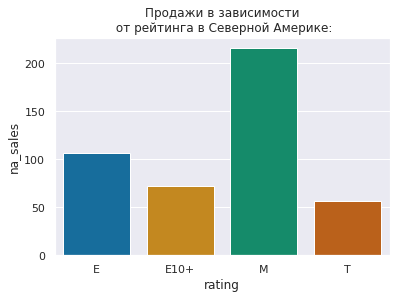

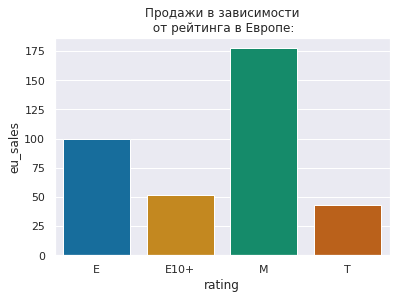

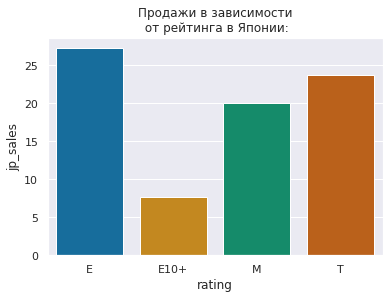

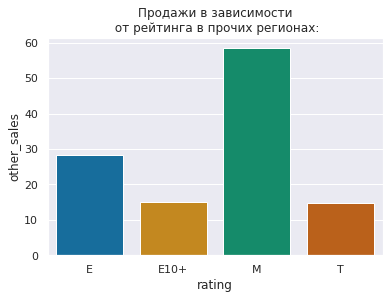

In [22]:
# создаем сводную таблицу продаж в зависимости от рейтинга по регионам
rating_and_sales = data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
display(rating_and_sales)
# пишем цикл для построения графиков
for region in region_sales:
    sns.barplot(x=rating_and_sales.index, y=rating_and_sales[region], palette = 'colorblind').set_title('Продажи в зависимости\n от рейтинга {}:'.format(region_dict[region]))
    plt.show()  

Влияние рейтинга ESRB на продажи в отдельном регионе.

Сначала необходимо пояснить значения данных рейтингов:
- E (Everyone) — «Для всех»
- E10+ (Everyone 10 and older) — «Для всех от 10 лет и старше»
- T (Teen) — «Подросткам»
- M (Mature) — «Для взрослых»

Из анализа данных видно, что распределение продаж по возрастным рейтингам примерно одинаково везде, кроме Японии. Примерно половина продаж - игры категории "для взрослых", четверть - "для всех" и поровну делят оставшуюся долю категории для подростков и "всех от 10 лет". В Японии же картина иная - сравнительно малая доля игр категории М, и примерно равные доли по 30% - остальных категорий. Что может объясняться строгостью законодательства. Отсюда делаем вывод, что японский рынок требует другого подхода для продвижения, и стоит вкладываться в рекламу иных продуктов, чем в остальном мире.

<a id='5'></a>

### Этап 5. Проверка гипотез

In [23]:
# создаем тестовые выборки
xbox_user_score = games.query('platform == "XOne"') 
xbox_user_score_test = xbox_user_score['user_score']
xbox_user_score_test = xbox_user_score_test.dropna()
pc_user_score = games.query('platform == "PC"')
pc_user_score_test = pc_user_score['user_score']
pc_user_score_test = pc_user_score_test.dropna()

# сравниваем дисперсии выборок
print('Рейтинг Xbox, дисперсия:     ', np.var(xbox_user_score_test, ddof=1))
print('Рейтинг PC, дисперсия:     ', np.var(pc_user_score_test, ddof=1))

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    xbox_user_score_test, 
    pc_user_score_test, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC различаются") # отвергаем нулевую гипотезу
else:
    print("Отвергнуть нулевую гипотезу не получилось, средние пользовательские рейтинги платформ Xbox One и PC равны между собой") # отвергнуть нулевую гипотезу не получилось

Рейтинг Xbox, дисперсия:      1.9069968
Рейтинг PC, дисперсия:      2.3407872
p-значение:  4.934974083359974e-06
Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC различаются


Мы сравниваем средние двух генеральных совокупностей - имея две выборки - по рейтингам платформ XOne и PC.

H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти. Например, если мы исследуем, не увеличилась ли величина, то нулевая гипотеза будет звучать: «нет, не увеличилась».

Нулевую гипотезу мы соответственно формулруем как "Средние пользовательские рейтинги платформ Xbox One и PC равны между собой", как альтернативную - "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

В результате применения метода st.ttest_ind() получаем p-value, меньший критического значения. Нулевую гипотезу можно отвергнуть. Так как дисперсии сравниваемых величин разные, параметр equal_val принимался равным False.

In [24]:
# создаем тестовые выборки
action_user_score = games.query('genre == "Action"')
action_user_score_test = action_user_score['user_score']
action_user_score_test = action_user_score_test.dropna()
sports_user_score = games.query('genre == "Sports"')
sports_user_score_test = sports_user_score['user_score']
sports_user_score_test = sports_user_score_test.dropna()

# сравниваем дисперсии выборок
print('Рейтинг жанра Action, дисперсия:     ', np.var(action_user_score_test, ddof=1))
print('Рейтинг жанра Sports, дисперсия:     ', np.var(sports_user_score_test, ddof=1))

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    action_user_score_test, 
    sports_user_score_test)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports различаются") # отвергаем нулевую гипотезу
else:
    print("Отвергнуть нулевую гипотезу не получилось, средние пользовательские рейтинги жанров Action и Sports равны между собой") # отвергнуть нулевую гипотезу не получилось

Рейтинг жанра Action, дисперсия:      2.0317469
Рейтинг жанра Sports, дисперсия:      2.5965147
p-значение:  0.10406992544164106
Отвергнуть нулевую гипотезу не получилось, средние пользовательские рейтинги жанров Action и Sports равны между собой


Здесь мы сравниваем среднее двух других генеральных совокупностей, имея две выборки - по пользовательским рейтингам жанров Action и Sports.

Нулевую гипотезу формулируем как "Cредние пользовательские рейтинги жанров Action и Sports равны между собой", а альтернативную - "Средние пользовательские рейтинги жанров Action и Sports различаются".

Используя тот же метод, что и для выручек по тарифам, получаем значение p-value, превышающее критический уровень значимости. А значит, нулевую гипотезу не удалось опровергнуть (но не подтвердить). С вероятностью примерно 10% распределение, при котором рейтинги равны, могло получиться случайно.

<a id='6'></a>

### Общий вывод

В ходе проекта были проанализированы данные о продажах видеоигр с 1980 по 2016 годы с целью выявить определяющие успешность игры закономерности и потенциально популярный продукт.

Была проведена подготовка данных - заполнены некоторые пропуска, данные приведены к нужным типам, посчитаны суммарные продажи.

В процессе исследования проанализирована динамика выпуска игр и их продаж по годам, и выделен актуальный период - с 2012 по 2015 годы, 2016 год не учитывался за счет неполноты данных. Были выявлены две растущие по популярности платформы - XOne и PS4. Проанализировано влияние на продажи игр оценок пользователей и критиков, показаны самые прибыльные жанры.

Составлен также портрет пользователя по регионам - какие платформы и жанры предпочитают жителеи каждого региона Земли, а также как в них влияет на продажи возрастной рейтинг. Основной вывод - японские пользователи сильно отличаются по своим предпочтениям от всех остальных.

Были также проверены две гипотезы: о том, что средние пользовательские рейтинги платформ Xbox One и PC равны между собой (отвергнута) и о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы (отвергнута противоположная гипотеза).

Общий вывод таков:
- При продвижении и рекламе продуктов следует ориентироваться на отзывы критиков. Упор в проодажах делать на продукт с высокими отзывами.
- Так же следует продавать игры на платформах XOne и PS4. PS4 также скорее всего будет сравнительно популярная и в Японии, как и ее предшественница PS3.
- Самые популярные жанры - Action, Shooter и RPG. Зайдут везде. В Японии особый упор следует делать на RPG, в остальном мире - на первые два жанра.
- По возрастным ограничениям - лучше всего продаются игры с рейтингами M и E.

In [25]:
# создаем тестовые выборки
xbox_user_score_test = games.query('platform == "XOne"')['user_score'].dropna() 

pc_user_score_test = games.query('platform == "PC"')['user_score'].dropna()

action_user_score_test = games.query('genre == "Action"')['user_score'].dropna()

sports_user_score_test = games.query('genre == "Sports"')['user_score'].dropna()

# сравниваем дисперсии выборок
print('Рейтинг Xbox, дисперсия:     ', np.var(xbox_user_score_test, ddof=1))
print('Рейтинг PC, дисперсия:     ', np.var(pc_user_score_test, ddof=1))
print()
print('Рейтинг жанра Action, дисперсия:     ', np.var(action_user_score_test, ddof=1))
print('Рейтинг жанра Sports, дисперсия:     ', np.var(sports_user_score_test, ddof=1))


Рейтинг Xbox, дисперсия:      1.9069968
Рейтинг PC, дисперсия:      2.3407872

Рейтинг жанра Action, дисперсия:      2.0317469
Рейтинг жанра Sports, дисперсия:      2.5965147


Из сравнения мы видим, что дисперсии обоих выборок различаются примерно на 25%. Построим для проверки распределения выборок графики Q-Q (квантиль - квантиль). На них будет видно отклонение каждой точки выборки от нормального гауссовского распределения, показываемого на графике красной прямой

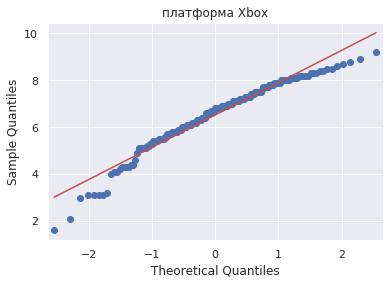

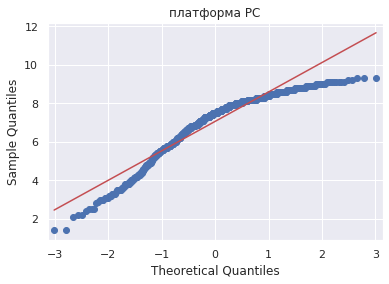

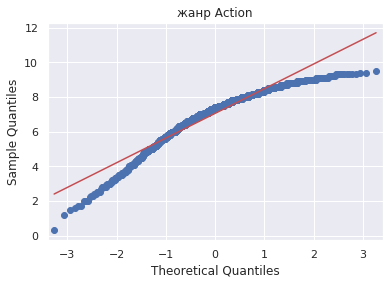

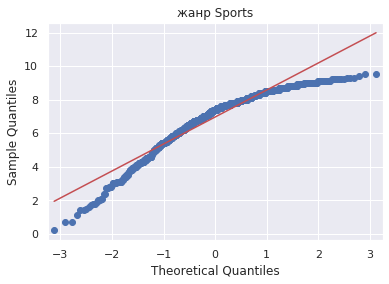

In [30]:
from statsmodels.graphics.gofplots import qqplot

#строим графики
qqplot(xbox_user_score_test, line='s')
plt.title('платформа Xbox')
plt.show()
qqplot(pc_user_score_test, line='s')
plt.title('платформа PC')
plt.show()
qqplot(action_user_score_test, line='s')
plt.title('жанр Action')
plt.show()
qqplot(sports_user_score_test, line='s')
plt.title('жанр Sports')
plt.show()

Видно, что распределения далеки от гауссовских. Проверим также эти распределения тестом Шапиро и построим гистограммы распределения вероятностей:

Проверим, распределены ли оценки пользователей Xbox One нормально:
Statistics=0.928, p=0.000
Нулевая гипотеза отвергнута (гипотеза о нормальном распределении отвергнута)


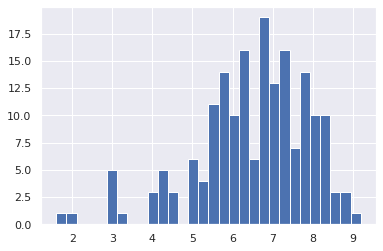


Проверим, распределены ли оценки пользователей PC нормально:
Statistics=0.928, p=0.000
Нулевая гипотеза отвергнута (гипотеза о нормальном распределении отвергнута)


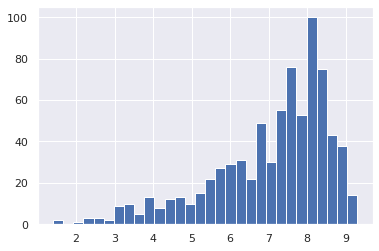


Проверим, распределены ли пользовательские рейтинги жанра Action нормально:
Statistics=0.928, p=0.000
Нулевая гипотеза отвергнута (гипотеза о нормальном распределении отвергнута)


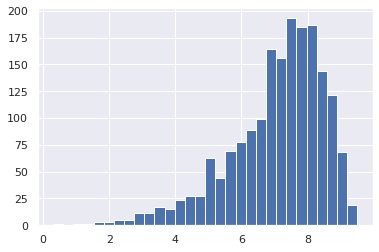


Проверим, распределены ли пользовательские рейтинги жанра Sports нормально:
Statistics=0.928, p=0.000
Нулевая гипотеза отвергнута (гипотеза о нормальном распределении отвергнута)


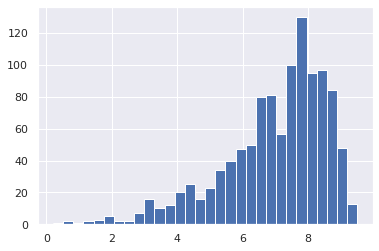

In [31]:
from scipy.stats import shapiro

# Функция, проверяющая тип распределения:
def shapirotest(data, alpha):
    
    stat, p = shapiro(action_user_score_test)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    if p < alpha: # Нулевая гипотеза - выборка принадлежит к нормально распределенной ген. совокупности:
    
        print("Нулевая гипотеза отвергнута (гипотеза о нормальном распределении отвергнута)")
    else:
        print("Нулевая гипотеза не может быть отвергнута (гипотеза о нормальном распределении не может быть отвергнута)")
        
# проверяем распределения тестом, строим гистограммы
print('Проверим, распределены ли оценки пользователей Xbox One нормально:')     
shapirotest(xbox_user_score_test, .05)
xbox_user_score_test.hist(bins = 30)
plt.show()

print('\nПроверим, распределены ли оценки пользователей PC нормально:')     
shapirotest(pc_user_score_test, .05)
pc_user_score_test.hist(bins = 30)
plt.show()

print('\nПроверим, распределены ли пользовательские рейтинги жанра Action нормально:')     
shapirotest(action_user_score_test, .05)
action_user_score_test.hist(bins = 30)
plt.show()

print('\nПроверим, распределены ли пользовательские рейтинги жанра Sports нормально:')     
shapirotest(sports_user_score_test, .05)
sports_user_score_test.hist(bins = 30)
plt.show()

Как мы видим, ни одно распределение не является нормальным. Все распределения смещены вправо, в сторону более высокой оценки.

p-value: 6.205360417589671e-09
Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC различаются


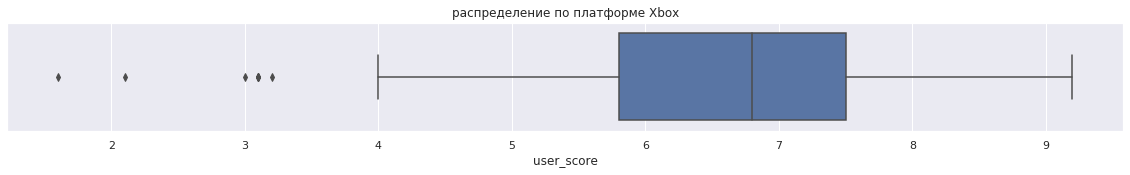

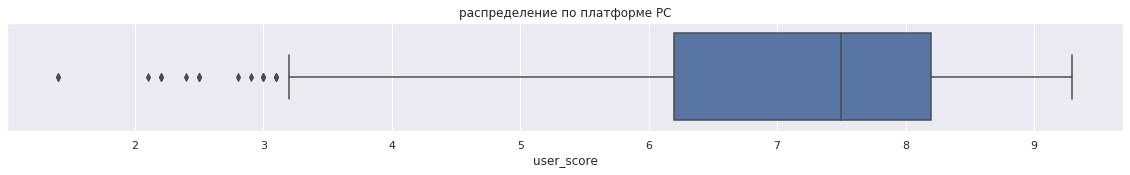

In [32]:
# проводим тест
result = st.mannwhitneyu(xbox_user_score_test, 
                         pc_user_score_test
                        )
alpha = .05
print('p-value: {}'.format(result.pvalue))

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC различаются") # отвергаем нулевую гипотезу
else:
    print("Отвергнуть нулевую гипотезу не получилось, средние пользовательские рейтинги платформ Xbox One и PC равны между собой") # отвергнуть нулевую гипотезу не получилось

# строим "ящики с усами"    
plt.figure(figsize=(20,2))
plt.title('распределение по платформе Xbox')
ax2 = sns.boxplot(x=xbox_user_score_test)

plt.figure(figsize=(20,2))
plt.title('распределение по платформе PC')
ax2 = sns.boxplot(x=pc_user_score_test)
plt.show()

p-value: 0.3590516668584349
Отвергнуть нулевую гипотезу не получилось, средние пользовательские рейтинги жанров Action и Sports равны между собой


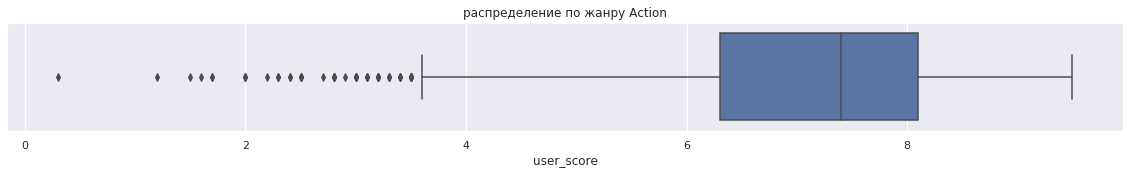

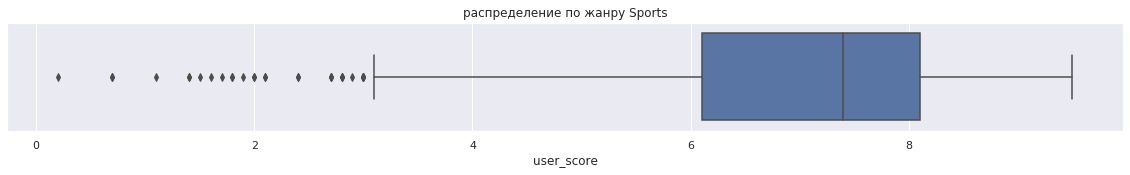

In [33]:
# проводим тест
result = st.mannwhitneyu(action_user_score_test, 
                         sports_user_score_test
                        )
alpha = .05
print('p-value: {}'.format(result.pvalue))

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports различаются") # отвергаем нулевую гипотезу
else:
    print("Отвергнуть нулевую гипотезу не получилось, средние пользовательские рейтинги жанров Action и Sports равны между собой") # отвергнуть нулевую гипотезу не получилось
    
plt.figure(figsize=(20,2))
plt.title('распределение по жанру Action')
ax2 = sns.boxplot(x=action_user_score_test)

# строим "ящики с усами" 
plt.figure(figsize=(20,2))
plt.title('распределение по жанру Sports')
ax2 = sns.boxplot(x=sports_user_score_test)
plt.show()

Проведя тест Манна-Уитни, выводы касательно гипотез остались теми же гипотеза о равенстве пользовательских рейтингов платформ XBox и PC отвергнута, гипотезу о равенстве рейтингов жанров Action и Sports отвергнуть не удалось. 

"Ящики с усами" это подтверждают и дополняют картину - в среднем рейтинг игр на ПК выше, чем на XBox, а средние рейтниги жанров Sports и Action практически равны, с немного большим разбросом оценок у спортивных игр.